# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
!pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
!pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 42.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data.shape

(4287, 9)

In [ ]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [ ]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [ ]:
df_data.tail()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


In [ ]:
df_data.isna().values.any()

True

In [ ]:
df_data.duplicated().values.any() # No two rows were all columns are duplicated

False

In [ ]:
df_data.duplicated(subset=['Organisation', 'Location', 'Date', 'Detail']).values.any()

True

In [ ]:
df_data[df_data.duplicated(subset=['Organisation', 'Location', 'Date', 'Detail'], keep=False)]

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
792,792,792,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,29.75,Success
793,793,793,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,29.75,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [ ]:
df_data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df_data.drop_duplicates(subset=['Organisation', 'Location', 'Date', 'Detail'], inplace=True)

## Descriptive Statistics

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4323 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4323 non-null   object
 1   Location        4323 non-null   object
 2   Date            4323 non-null   object
 3   Detail          4323 non-null   object
 4   Rocket_Status   4323 non-null   object
 5   Price           963 non-null    object
 6   Mission_Status  4323 non-null   object
dtypes: object(7)
memory usage: 270.2+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
mission_per_org = df_data['Organisation'].value_counts()

In [ ]:
px_bar = px.bar(x=mission_per_org.values[:20],
                y = mission_per_org.index[:20],
                orientation='h',
                color=mission_per_org.values[:20],
                color_continuous_scale='Viridis',
                title='Number of Missions by Organization')


px_bar.update_layout(xaxis_title = 'Num of Missions',
                     yaxis_title = 'Organization',
                     coloraxis_showscale = False,
                     yaxis = {'categoryorder' : 'total ascending'})


px_bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [ ]:
active_retired = df_data['Rocket_Status'].value_counts()

In [ ]:
px_pie = px.pie(values=active_retired.values,
                names = active_retired.index,
                labels=active_retired.index,
                hole = 0.3)

px_pie.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
suc_fail = df_data['Mission_Status'].value_counts()

In [ ]:
px_pie = px.pie(values = suc_fail.values,
                names = suc_fail.index,
                labels = suc_fail.index,
                hole = 0.2)

px_pie.show()

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [ ]:
df_data['Price'] = df_data['Price'].astype(str).str.strip()

In [ ]:
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4323 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    4323 non-null   object 
 1   Location        4323 non-null   object 
 2   Date            4323 non-null   object 
 3   Detail          4323 non-null   object 
 4   Rocket_Status   4323 non-null   object 
 5   Price           948 non-null    float64
 6   Mission_Status  4323 non-null   object 
dtypes: float64(1), object(6)
memory usage: 270.2+ KB


In [ ]:
px_histogram = px.histogram(
                            x = df_data['Price'],
                            title = 'How Much does a Mission Cost in Average?')

px_histogram.update_layout(xaxis_title = 'Mission Cost',
                           yaxis_title = 'Num of Missions')


px_histogram.show()

In [ ]:
df_data['Price'].max()

450.0

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
names_to_change = ['Russia', 'New Mexico', 'Yellow Sea', 'Shahrud Missile Test Site', 'Pacific Missile Range Facility', 'Barents Sea', 'Gran Canaria']
replacements = ['Russian Federation', 'USA', 'China', 'Iran', 'USA', 'Russian Federation', 'USA']

for name, replacement in zip(names_to_change, replacements):
    df_data['Location'] = df_data['Location'].astype(str).str.replace(name, replacement)


In [ ]:
df_data.head(n=3)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success


In [ ]:
for index in df_data.index:
  country = df_data.loc[index, 'Location'].split(", ")[-1]
  df_data.loc[index, 'Country'] = country

In [ ]:
df_data['Country'] = df_data['Country'].astype(str).str.replace('Iran', 'Iran, Islamic Republic of')

In [ ]:
df_data['Country'] = df_data['Country'].astype(str).str.replace('North Korea', "Korea, Democratic People's Republic of")

In [ ]:
df_data = df_data.drop(df_data[df_data['Country'] == 'Pacific Ocean'].index)

In [ ]:
df_data['Country'] = df_data['Country'].astype(str).str.replace('North Korea', "Korea, Democratic People's Republic of")

In [ ]:
mission_by_country = df_data['Country'].value_counts()
mission_by_country

,count
Country,
Russian Federation,1398
USA,1351
Kazakhstan,701
France,303
China,268
Japan,126
India,76
"Iran, Islamic Republic of",14
New Zealand,13


In [ ]:
px_choropleth = px.choropleth(locations=mission_by_country.index,
                              locationmode='country names',
                              color = mission_by_country.values,
                              color_continuous_scale = 'matter')


px_choropleth.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
rows_status_failure = df_data.loc[df_data['Mission_Status'] == 'Failure']

In [ ]:
countries_total_fail = rows_status_failure['Country'].value_counts()

In [ ]:
px_choropleth = px.choropleth(locations=countries_total_fail.index,
                              locationmode= 'country names',
                              color = countries_total_fail.values,
                              color_continuous_scale = 'matter')


px_choropleth.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [ ]:
px_sunburst = px.sunburst(data_frame=df_data,
                          path = ['Country', 'Organisation', 'Mission_Status'])

px_sunburst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
df_data.head(n=2)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China


In [ ]:
money_by_org = df_data.groupby('Organisation', as_index=False).agg({'Price' : 'sum'})
money_by_org.sort_values('Price', ascending=False, inplace=True)

In [ ]:
px_bar = px.bar(data_frame=money_by_org[:20],
                x = 'Price',
                y = 'Organisation',
                color = 'Price',
                orientation='h',
                color_continuous_scale='agsunset',
                title = 'Top 20 Organizations with the Most Amount Spent on Space Missions')


px_bar.update_layout(xaxis_title = 'Total Cost in USD Million',
                     yaxis_title = 'Organization',
                     coloraxis_showscale = False,
                     yaxis = {'categoryorder' : 'total ascending'})


px_bar.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
money_launch_org  = df_data.groupby('Organisation', as_index=False).agg({"Price" : "mean"})
money_launch_org.sort_values('Price', ascending=False, inplace=True)

In [ ]:
px_bar = px.bar(data_frame=money_launch_org[:20],
                x = 'Price',
                y = 'Organisation',
                orientation='h',
                color = 'Price',
                color_continuous_scale='matter',
                title='Top 20 Organization with the most Amount Spent (on Average) on Each Launch')


px_bar.update_layout(xaxis_title = 'Av. Price',
                     yaxis_title = 'Organization',
                     coloraxis_showscale=False,
                     yaxis={'categoryorder' : 'total ascending'})


px_bar.show()

# Chart the Number of Launches per Year

In [ ]:
df_data['Date'] = pd.to_datetime(df_data['Date'], format='mixed', utc=True)

In [ ]:
df_data['Year'] = df_data['Date'].dt.year

In [ ]:
launch_per_year = df_data.groupby('Year', as_index=False).agg({"Detail" : "count"})
launch_per_year.rename({'Detail' : 'Num_launch'}, axis=1, inplace=True)
launch_per_year.sort_values('Year', inplace=True)
launch_per_year['Year'] = pd.to_datetime(launch_per_year['Year'], format='%Y')
launch_per_year.head()

,Year,Num_launch
0,1957-01-01,3
1,1958-01-01,28
2,1959-01-01,20
3,1960-01-01,39
4,1961-01-01,52


In [ ]:
launch_per_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Year        64 non-null     datetime64[ns]
 1   Num_launch  64 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 KB


In [ ]:
launch_per_year_index = launch_per_year.set_index('Year')
launch_per_year_roll = launch_per_year_index.rolling(window=3).mean()
launch_per_year_roll

,Num_launch
Year,
1957-01-01,NaN
1958-01-01,NaN
1959-01-01,17.00
1960-01-01,29.00
1961-01-01,37.00
...,...
2016-01-01,64.67
2017-01-01,78.00
2018-01-01,99.67


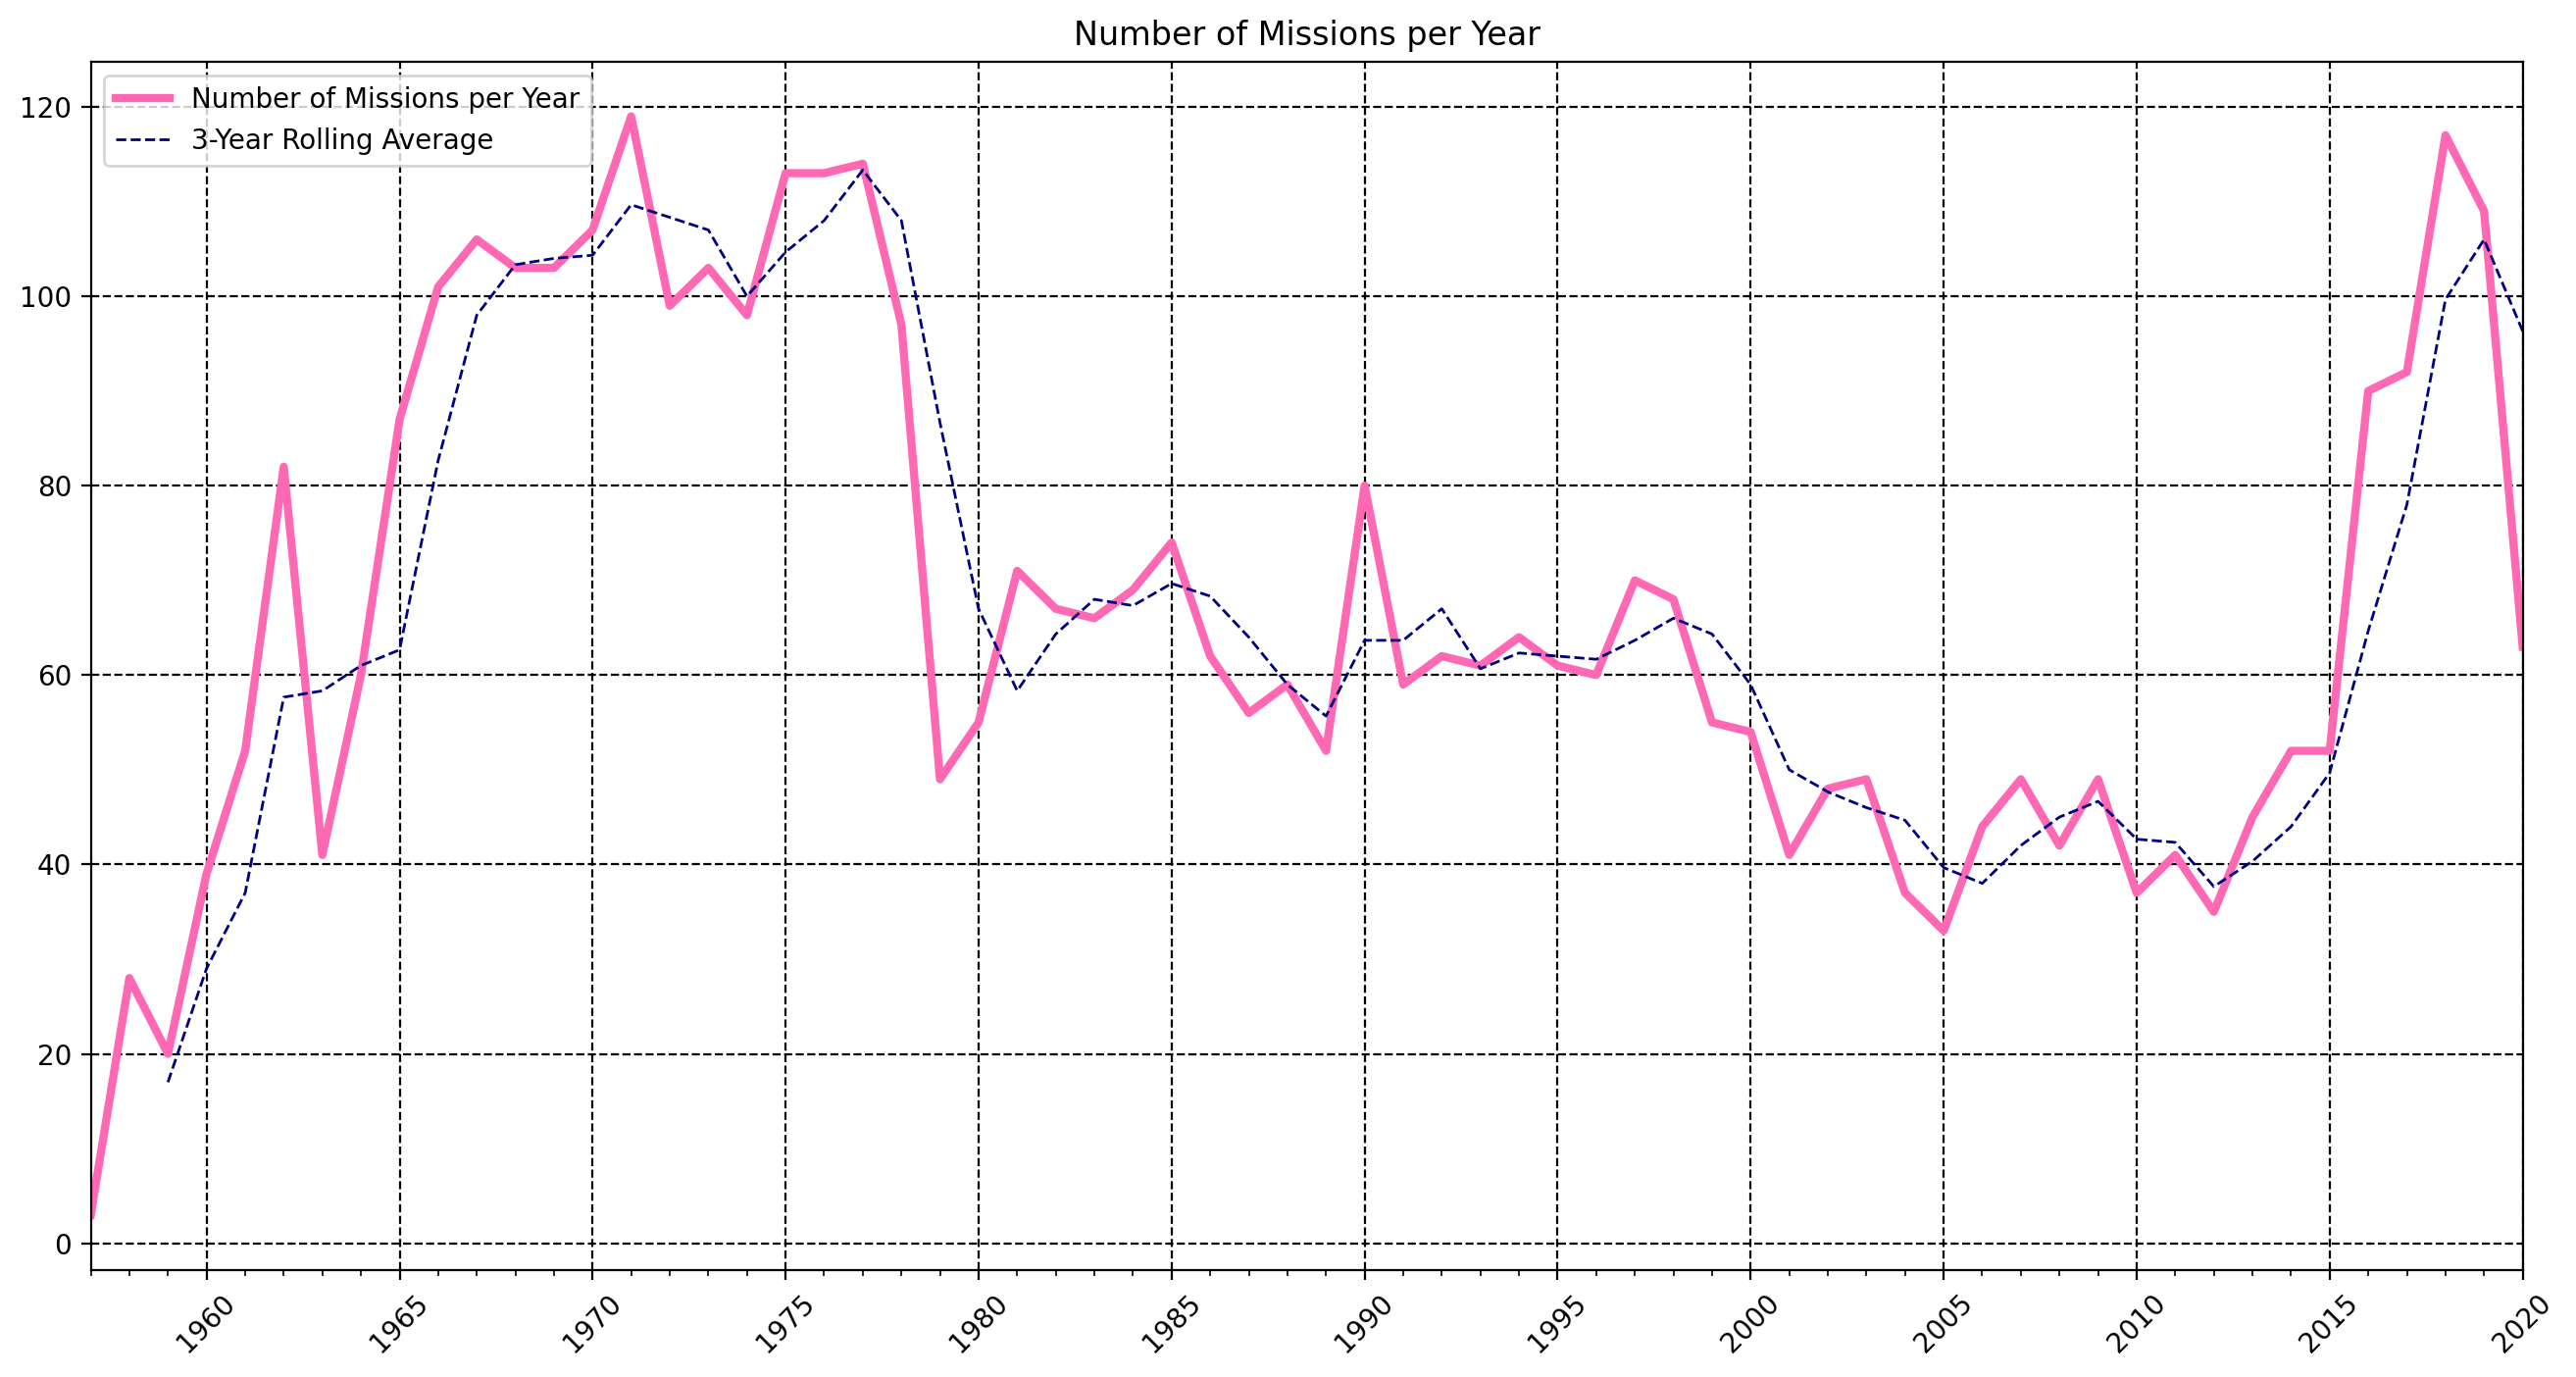

In [ ]:
year = mdates.YearLocator(base=5)
years = mdates.YearLocator()
year_fmt = mdates.DateFormatter('%Y')





plt.figure(dpi = 200, figsize=(16, 8))
plt.title('Number of Missions per Year')

ax = plt.gca()

ax.plot(launch_per_year['Year'],
                   launch_per_year['Num_launch'],
                   color = 'hotpink',
                   ls = '-',
        label = 'Number of Missions per Year',
        lw = 3)

ax.plot(launch_per_year_roll.index,
        launch_per_year_roll['Num_launch'],
        color = 'navy',
        ls = '--',
        lw = 1,
        label = '3-Year Rolling Average')


plt.xticks(rotation = 45)
plt.grid(color='k', ls = '--')
ax.set_xlim(launch_per_year['Year'].min(), launch_per_year['Year'].max())

ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_fmt)
ax.xaxis.set_minor_locator(years)

plt.legend()



plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [ ]:
df_data['Date'] = pd.to_datetime(df_data['Date'])

In [ ]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,2020


In [ ]:
df_data['Date'] = pd.to_datetime(df_data['Date'])
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-01,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-01,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-01,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-01,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-01,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA


In [ ]:
mission_by_month = df_data.groupby('Date', as_index=False).agg({'Detail' : 'count'})
mission_by_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    746 non-null    datetime64[ns]
 1   Detail  746 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.8 KB


In [ ]:
mission_by_month.head()

,Date,Detail
0,1957-10-01,1
1,1957-11-01,1
2,1957-12-01,1
3,1958-02-01,2
4,1958-03-01,3


In [ ]:
mission_by_month.sort_values(by = 'Date', ascending=True, inplace=True)
mission_by_month.rename({'Detail' : 'Total_mission'}, axis=1, inplace=True)
mission_by_month_indexed = mission_by_month.set_index('Date')
mission_by_month.describe()

,Date,Total_mission
count,746,746.00
mean,1989-04-28 23:32:58.552278784,5.75
min,1957-10-01 00:00:00,1.00
25%,1973-10-08 18:00:00,4.00
50%,1989-04-16 00:00:00,5.00
75%,2004-11-23 12:00:00,8.00
max,2020-08-01 00:00:00,18.00
std,NaN,3.10


In [ ]:
mission_by_month_rolling = mission_by_month_indexed.rolling(window = 18).mean()

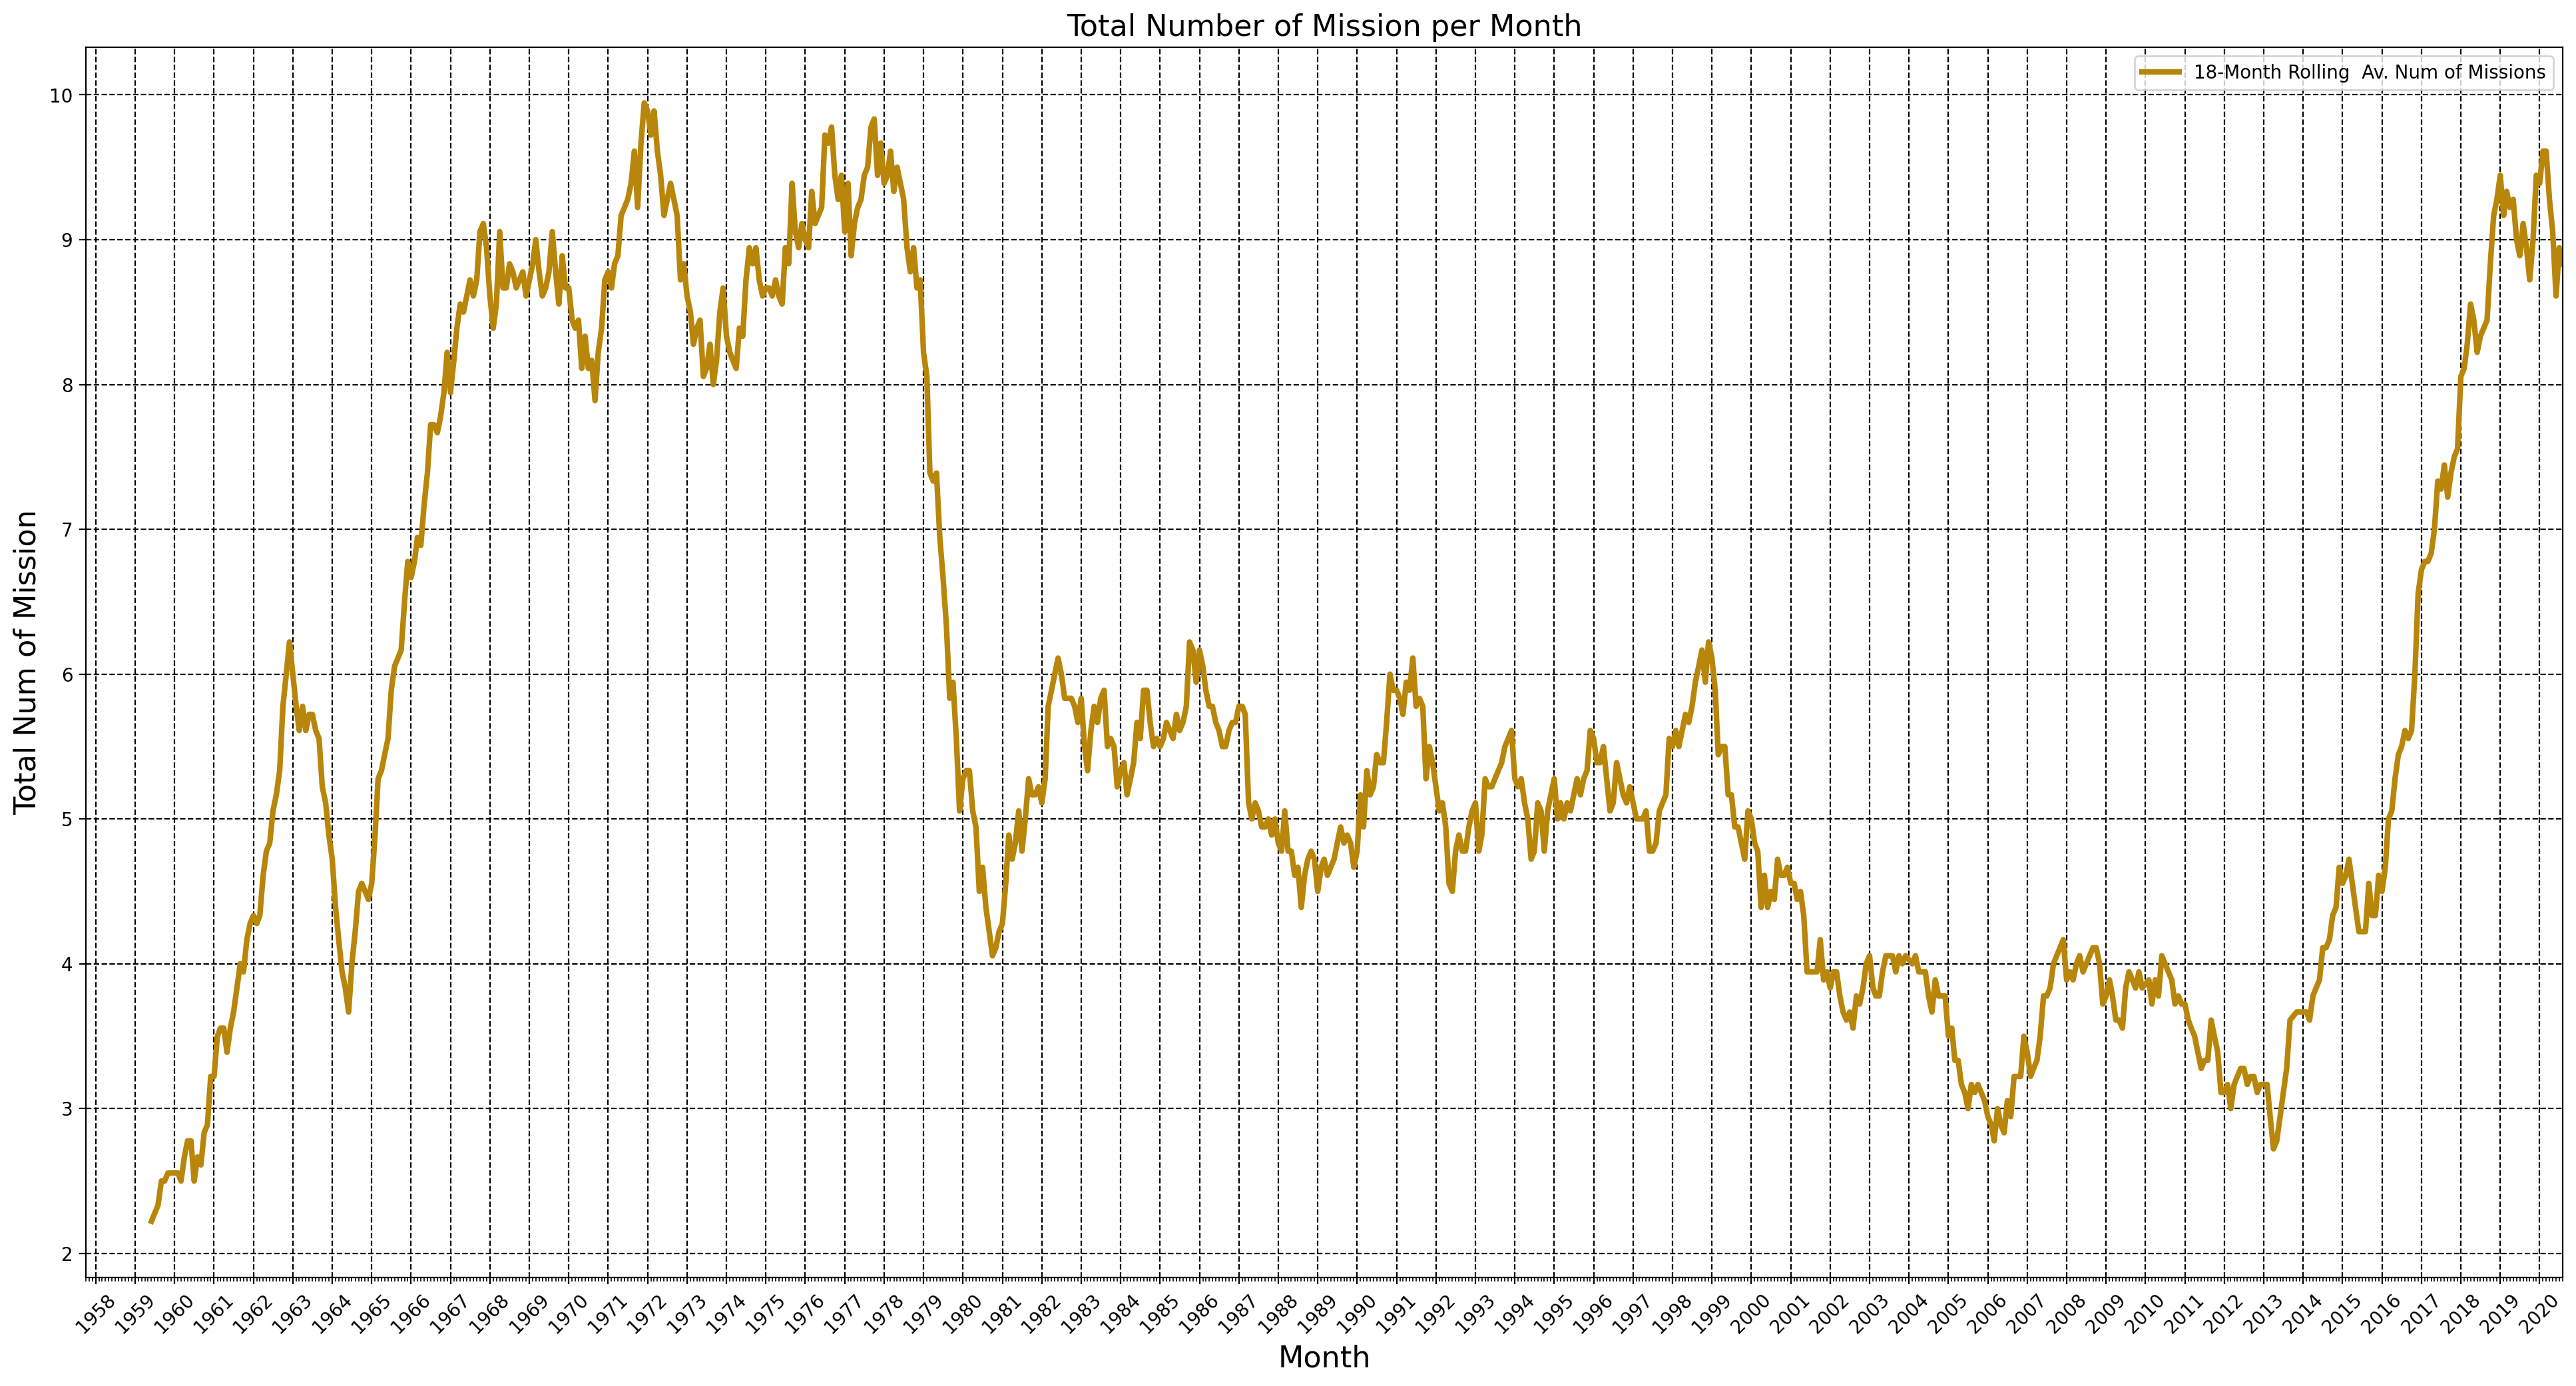

In [ ]:


month_locator = mdates.MonthLocator()
year_locator = mdates.YearLocator(base = 1)
year_formatter = mdates.DateFormatter('%Y')



plt.figure(figsize = (24, 12), dpi = 200)
plt.title('Total Number of Mission per Month', fontsize = 16)
plt.xticks(rotation = 45)

ax = plt.gca()
ax.plot(mission_by_month_rolling.index,
        mission_by_month_rolling.values,
        c = 'darkgoldenrod',
        ls = '-',
        lw = 3,
        label = '18-Month Rolling  Av. Num of Missions')

ax.set_xlim(mission_by_month_rolling.index.min(), mission_by_month_rolling.index.max())
ax.set_xlabel('Month', fontsize = 16)
ax.set_ylabel('Total Num of Mission', fontsize = 16)


plt.legend()

plt.grid(c = 'k', ls = '--')


ax.xaxis.set_major_locator(year_locator)
ax.xaxis.set_minor_locator(month_locator)
ax.xaxis.set_major_formatter(year_formatter)


plt.show()

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [ ]:
df_data['Year'] = df_data['Date'].dt.year

In [ ]:
df_data['Year'] = pd.to_datetime(df_data['Year'], format='%Y')

In [ ]:
av_price_by_year = df_data.groupby('Year').agg({'Price' : 'mean'})
av_price_by_year.head(n=15)

,Price
Year,
1957-01-01,NaN
1958-01-01,NaN
1959-01-01,NaN
1960-01-01,NaN
1961-01-01,NaN
1962-01-01,NaN
1963-01-01,NaN
1964-01-01,63.23
1965-01-01,63.23


In [ ]:
df_data.loc[df_data['Year'] == 1971]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year


In [ ]:
av_price_by_year_roll = av_price_by_year.rolling(window = 6).mean()

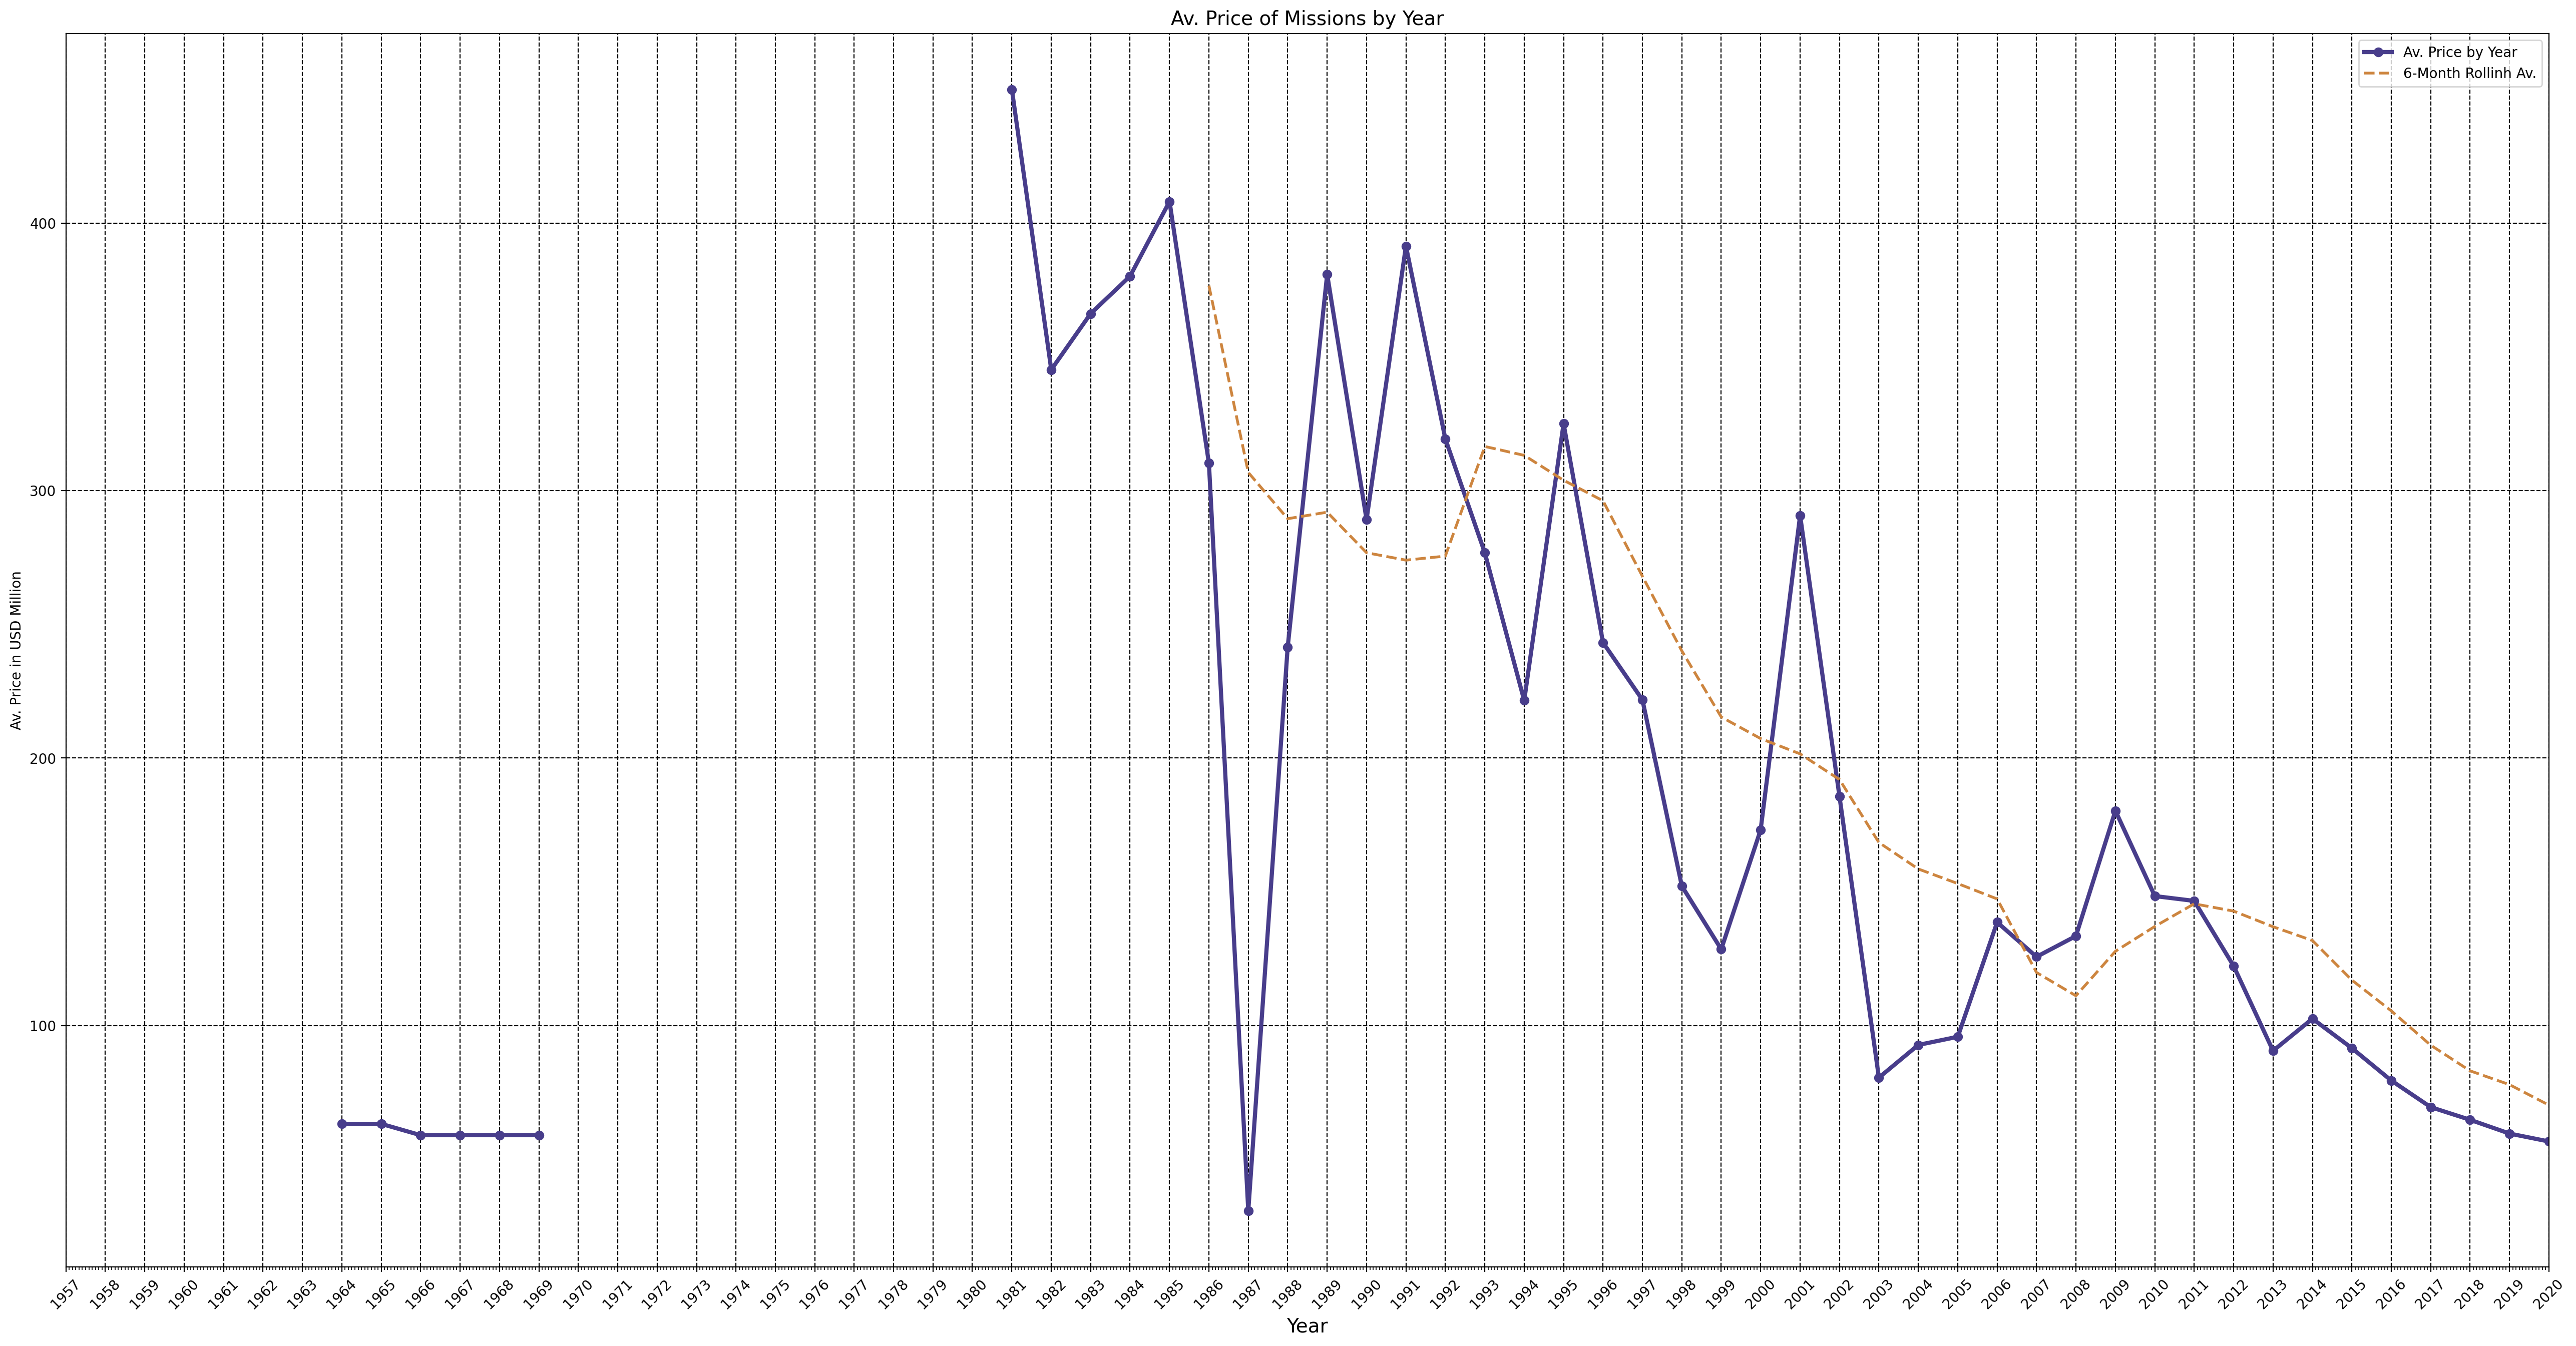

In [ ]:
month_locator = mdates.MonthLocator()
year_locator = mdates.YearLocator()
year_formatter = mdates.DateFormatter('%Y')



plt.figure(figsize = (32, 16), dpi = 200)
ax = plt.gca()
ax.plot(av_price_by_year.index,
        av_price_by_year.values,
        c = 'darkslateblue',
        ls = '-',
        lw = 3,
        marker = "o",
        label = 'Av. Price by Year')

ax.plot(av_price_by_year_roll.index,
        av_price_by_year_roll.values,
        c = 'peru',
        ls = '--',
        lw = 2,
        label = '6-Month Rollinh Av.')

plt.title('Av. Price of Missions by Year', fontsize = 14)

plt.xticks(rotation = 45)
ax.set_xlim(av_price_by_year.index.min(), av_price_by_year.index.max())
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Av. Price in USD Million')




plt.grid(c = 'k', ls ='--')
plt.legend()



ax.xaxis.set_major_locator(year_locator)
ax.xaxis.set_minor_locator(month_locator)
ax.xaxis.set_major_formatter(year_formatter)

plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [ ]:
org_year = df_data.groupby(['Year', 'Organisation'], as_index=False).agg({'Detail' : 'count'})
org_year.rename({'Detail' : 'Num_mission'}, axis = 1, inplace = True)

,Year,Organisation,Num_mission
0,1957-01-01,RVSN USSR,2
1,1957-01-01,US Navy,1
2,1958-01-01,AMBA,7
3,1958-01-01,NASA,2
4,1958-01-01,RVSN USSR,5


In [ ]:
org_year['Total'] = org_year.groupby('Organisation')['Num_mission'].cumsum()

In [ ]:
px_line = px.line(data_frame=org_year,
                  x = 'Year',
                  y = 'Total',
                  color = 'Organisation',
                  title = 'Mission per Year')

px_line.show()

In [ ]:
missions_per_org = df_data.groupby('Organisation', as_index=False).agg({"Detail" : "count"})
missions_per_org.sort_values('Detail', ascending = False, inplace = True)
top_ten = missions_per_org[:10]
top_ten

,Organisation,Detail
40,RVSN USSR,1777
3,Arianespace,279
17,General Dynamics,251
7,CASC,250
35,NASA,203
51,VKS RF,201
48,US Air Force,161
47,ULA,140
6,Boeing,136
34,Martin Marietta,114


In [ ]:
org_year_top_ten = org_year.merge(top_ten, how='inner', on = 'Organisation')
org_year_top_ten.drop(columns = ['Detail'], axis = 1, inplace=True)

In [ ]:
px_line = px.line(data_frame=org_year_top_ten,
                  x = 'Year',
                  y = 'Total',
                  color = 'Organisation',
                  title = 'Total Number of Missions Conducted by Top 10 Organizations')


px_line.update_layout(xaxis_title = 'Year',
                      yaxis_title = 'Total Number of Missions')

px_line.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [ ]:
cold_war_finished_date = datetime(1991, 12, 26)

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [ ]:
soviet_union = df_data.loc[((df_data['Country'] == 'Kazakhstan') | (df_data['Country'] == 'Russian Federation'))  & (df_data['Date'].dt.date <= cold_war_finished_date.date())]
us_launches = df_data.loc[df_data['Country'] == 'USA']

In [ ]:
soviet_union.loc[:, 'Total'] = soviet_union['Date'].count() #1770
us_launches.loc[:, 'Total'] = us_launches['Date'].count() #1351
soviet_union.head()

<ipython-input-230-08f06c8979e9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-230-08f06c8979e9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,Total
1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991-12-01,Rokot/Briz K | GVM Demo Flight,StatusRetired,NaN,Success,Kazakhstan,1991-01-01,1770
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russian Federa...",1991-12-01,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,Russian Federation,1991-01-01,1770
1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russian Feder...",1991-11-01,Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success,Russian Federation,1991-01-01,1770
1725,RVSN USSR,"Site 32/1, Plesetsk Cosmodrome, Russian Federa...",1991-11-01,Tsyklon-3 | Cosmos 2165 to 2170,StatusRetired,NaN,Success,Russian Federation,1991-01-01,1770
1728,RVSN USSR,"Site 132/1, Plesetsk Cosmodrome, Russian Feder...",1991-10-01,Cosmos-3M (11K65M) | Cosmos 2164,StatusRetired,NaN,Success,Russian Federation,1991-01-01,1770


In [ ]:
ussr_vs_us = pd.Series([1770, 1351], index=['USSR', 'USA'], name='ussr_vs_us')

In [ ]:
px_pie = px.pie(values=ussr_vs_us.values,
                names=ussr_vs_us.index,
                labels = ussr_vs_us.index)


px_pie.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
ussr_year_by_year = soviet_union.groupby('Year', as_index=False).agg({'Date' : 'count'})
ussr_year_by_year['Total'] = ussr_year_by_year['Date'].cumsum()
ussr_year_by_year.rename({"Date" : 'Num_mission'}, axis = 1, inplace=True)

In [ ]:
us_year_by_year = us_launches.groupby('Year', as_index=False).agg({'Date' : 'count'})
us_year_by_year['Total'] = us_year_by_year['Date'].cumsum()
us_year_by_year.rename({"Date" : 'Num_mission'}, axis = 1, inplace=True)

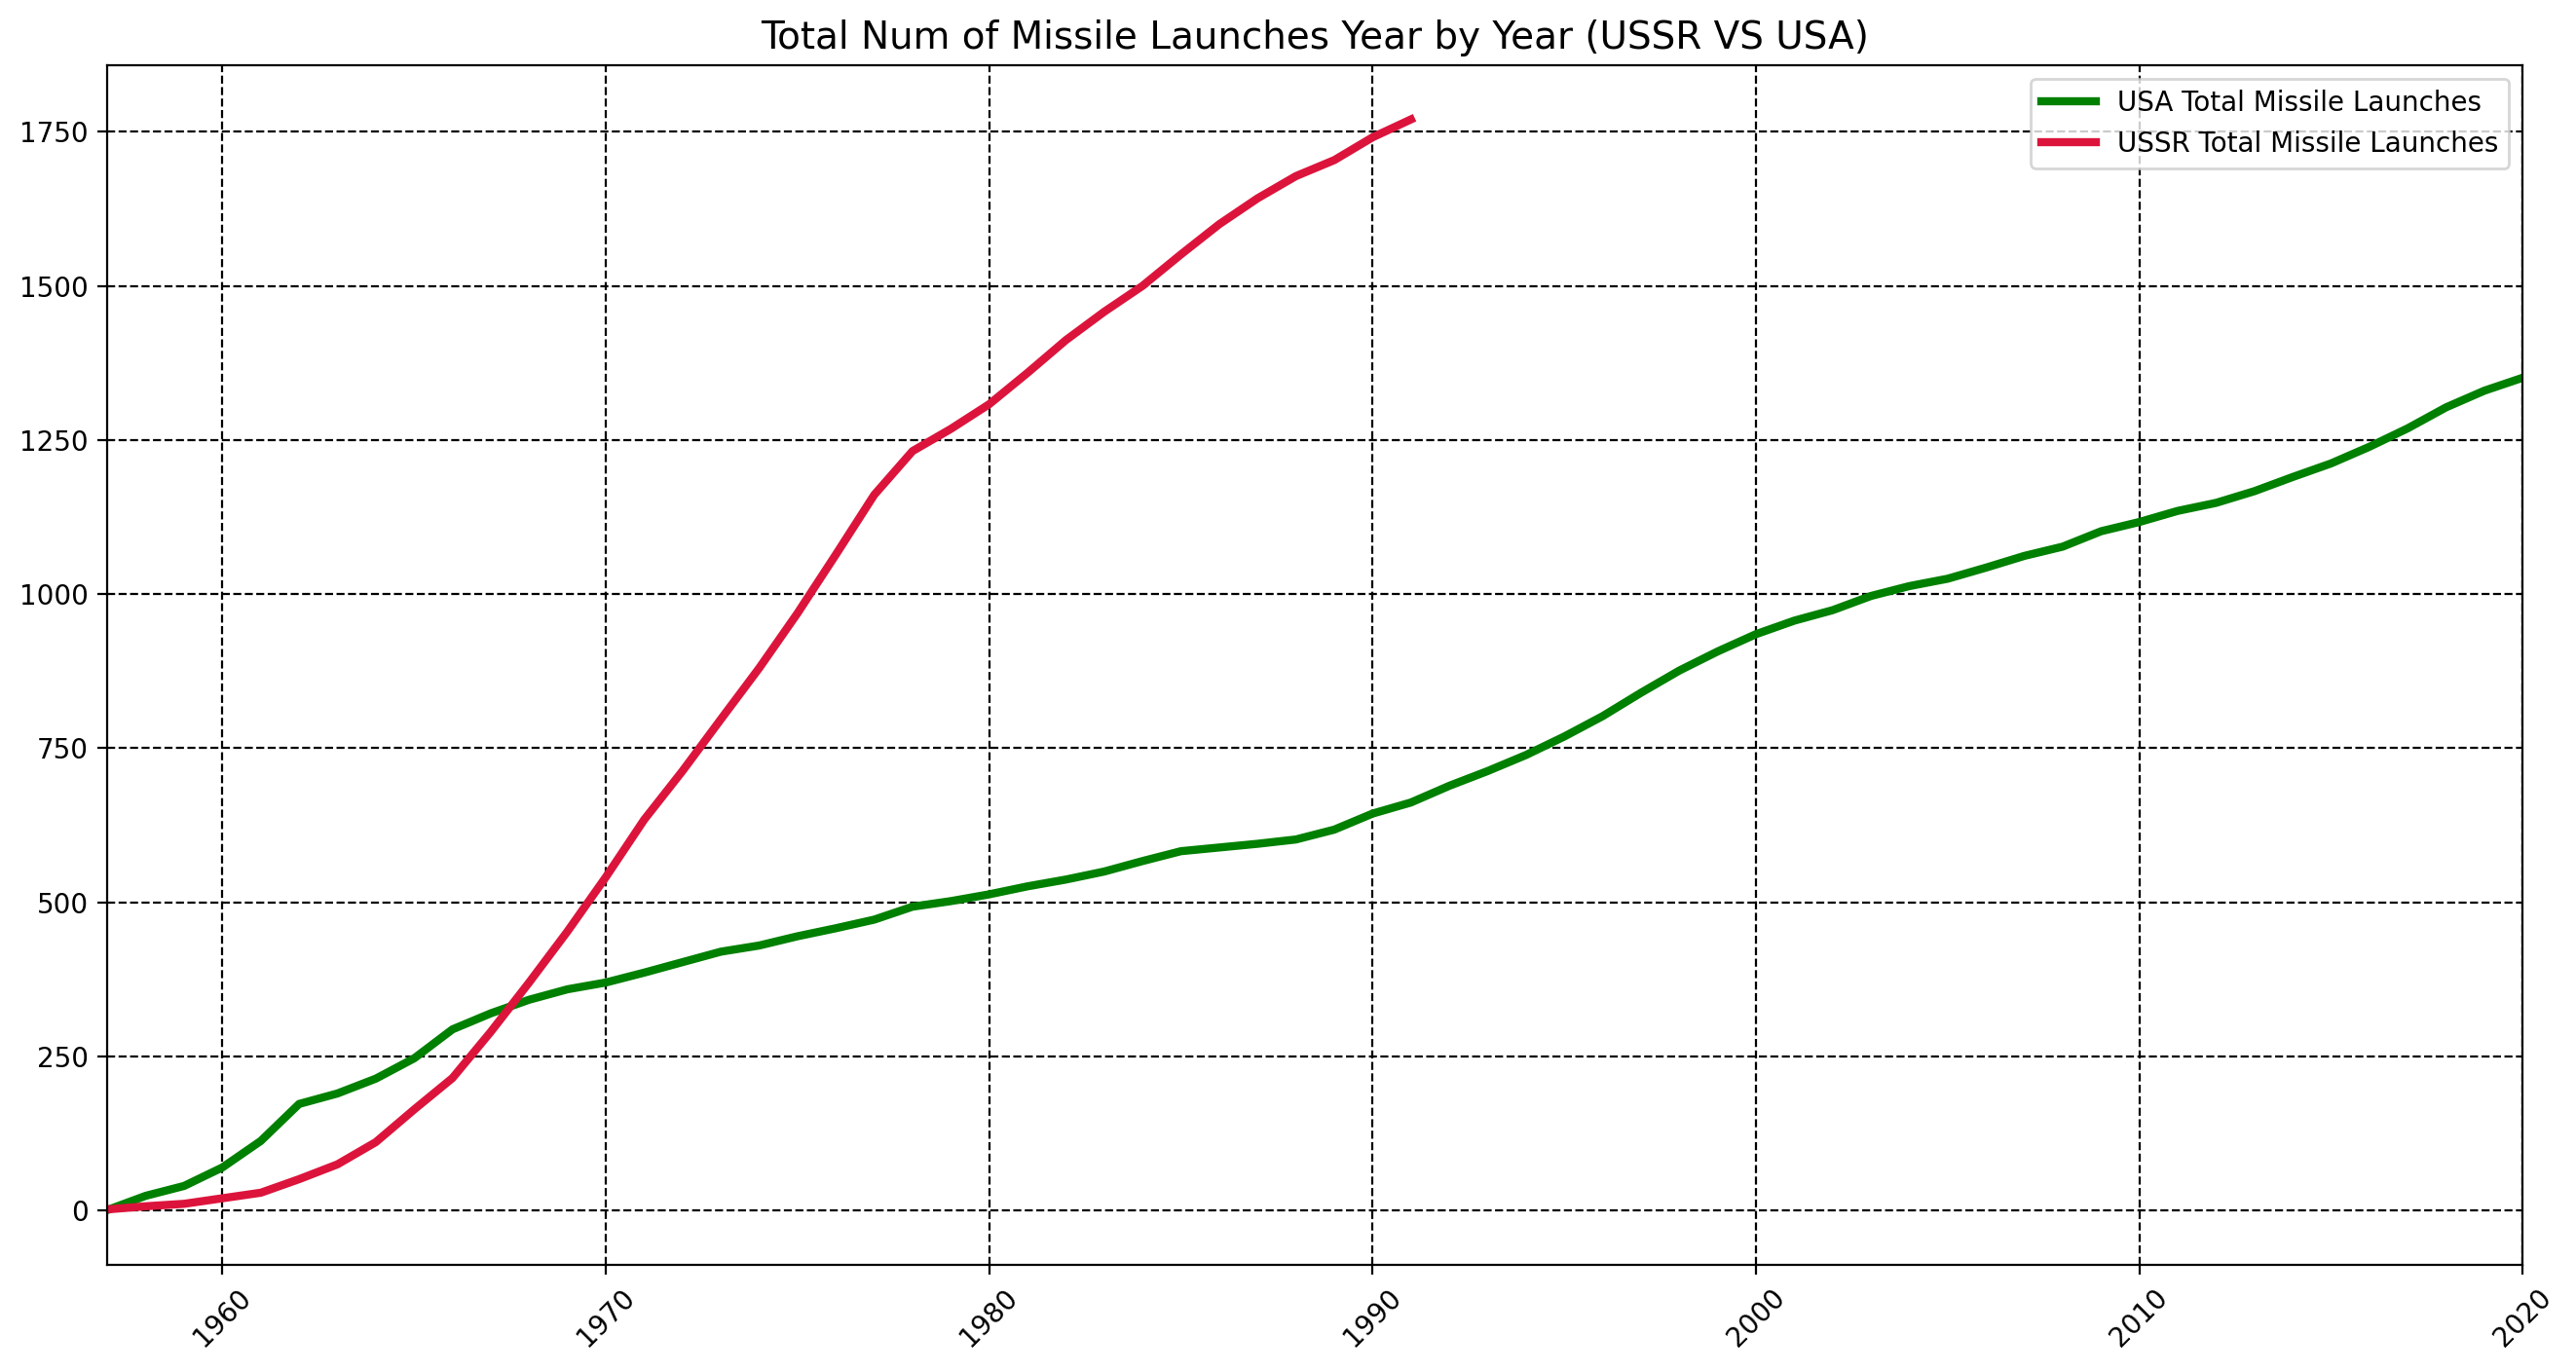

In [ ]:
plt.figure(figsize= (16, 8), dpi = 200)
plt.title('Total Num of Missile Launches Year by Year (USSR VS USA)', fontsize = 14)
plt.xticks(rotation = 45)


ax = plt.gca()
ax.plot(us_year_by_year['Year'],
        us_year_by_year['Total'],
        c = 'green',
        lw = 3,
        label = 'USA Total Missile Launches')

ax.plot(ussr_year_by_year['Year'],
        ussr_year_by_year['Total'],
        c = 'crimson',
        lw = 3,
        label = 'USSR Total Missile Launches')

ax.set_xlim(ussr_year_by_year['Year'].min(), us_year_by_year['Year'].max())
plt.legend()
plt.grid(c = 'k', ls = '--')




plt.show()



## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
fail_on_year = df_data.groupby(['Year', 'Mission_Status'], as_index=False).agg({'Detail' : 'count'})
fail_on_year.rename({'Detail' : 'Num_mission'}, axis=1, inplace=True)
fail_on_year_rows = fail_on_year.loc[fail_on_year['Mission_Status'] == 'Failure']
fail_on_year_rows.head()

,Year,Mission_Status,Num_mission
0,1957-01-01,Failure,1
2,1958-01-01,Failure,20
5,1959-01-01,Failure,9
8,1960-01-01,Failure,20
10,1961-01-01,Failure,17


In [ ]:
fail_on_year_rows.loc[:, 'Year'] = pd.to_datetime(fail_on_year_rows['Year'], format='%Y')
fail_on_year_rows.tail()

,Year,Mission_Status,Num_mission
162,2016-01-01,Failure,2
166,2017-01-01,Failure,6
169,2018-01-01,Failure,2
172,2019-01-01,Failure,6
176,2020-01-01,Failure,6


In [ ]:
fail_on_year_rows_index = fail_on_year_rows.set_index('Year')
fail_on_year_rows_roll = fail_on_year_rows_index['Num_mission'].rolling(window=5).mean()
fail_on_year_rows_roll

,Num_mission
Year,
1957-01-01,NaN
1958-01-01,NaN
1959-01-01,NaN
1960-01-01,NaN
1961-01-01,13.40
...,...
2016-01-01,2.00
2017-01-01,2.60
2018-01-01,2.80


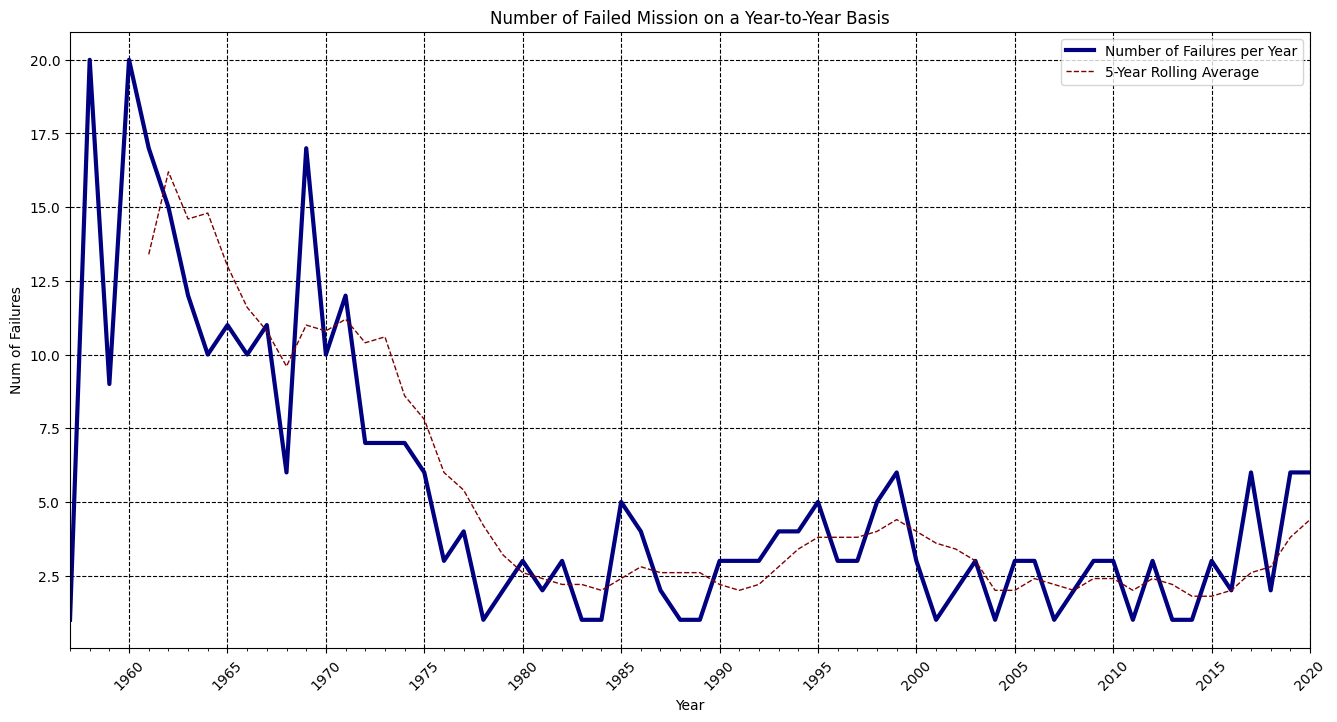

In [ ]:
year = mdates.YearLocator(base=5)
years = mdates.YearLocator()
year_fmt = mdates.DateFormatter('%Y')





plt.figure(figsize = (16, 8))
plt.title('Number of Failed Mission on a Year-to-Year Basis')

ax=plt.gca()
ax.plot(fail_on_year_rows['Year'],
        fail_on_year_rows['Num_mission'],
        lw = 3,
        color = 'navy',
        label = 'Number of Failures per Year')

ax.plot(fail_on_year_rows_roll.index,
        fail_on_year_rows_roll.values,
        ls = '--',
        lw = 1,
        label = '5-Year Rolling Average',
        c = 'maroon')


ax.set_xlim(fail_on_year_rows['Year'].min(), fail_on_year_rows['Year'].max())
ax.xaxis.set_major_locator(year)
ax.xaxis.set_minor_locator(years)
ax.xaxis.set_major_formatter(year_fmt)

ax.set_xlabel('Year')
ax.set_ylabel('Num of Failures')

plt.xticks(rotation = 45)
plt.grid(c='k', ls = '--')

plt.legend()


plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [ ]:
num_per_year = df_data.groupby('Year', as_index=False).agg({'Date' : 'count'})
num_per_year.rename({'Date' : 'Total'}, axis = 1, inplace = True)
num_per_year.head()

,Year,Total
0,1957-01-01,3
1,1958-01-01,28
2,1959-01-01,20
3,1960-01-01,39
4,1961-01-01,52


In [ ]:
num_status_per_year = df_data.groupby(['Year', 'Mission_Status' ], as_index=False).agg({'Date' : 'count'})
num_status_per_year.rename({'Date' : 'Num'}, axis = 1, inplace = True)
num_status_per_year = num_status_per_year.loc[num_status_per_year['Mission_Status'] == 'Failure']

In [ ]:
num_stat_final = num_per_year.merge(right = num_status_per_year, on = 'Year')
num_stat_final.sort_values(by = 'Year', inplace=True)
num_stat_final['Failure_pct'] = round(num_stat_final['Num'] / num_stat_final['Total'], 2)
num_stat_final.head(n=10)

,Year,Total,Mission_Status,Num,Failure_pct
0,1957-01-01,3,Failure,1,0.33
1,1958-01-01,28,Failure,20,0.71
2,1959-01-01,20,Failure,9,0.45
3,1960-01-01,39,Failure,20,0.51
4,1961-01-01,52,Failure,17,0.33
5,1962-01-01,82,Failure,15,0.18
6,1963-01-01,41,Failure,12,0.29
7,1964-01-01,60,Failure,10,0.17
8,1965-01-01,87,Failure,11,0.13
9,1966-01-01,101,Failure,10,0.10


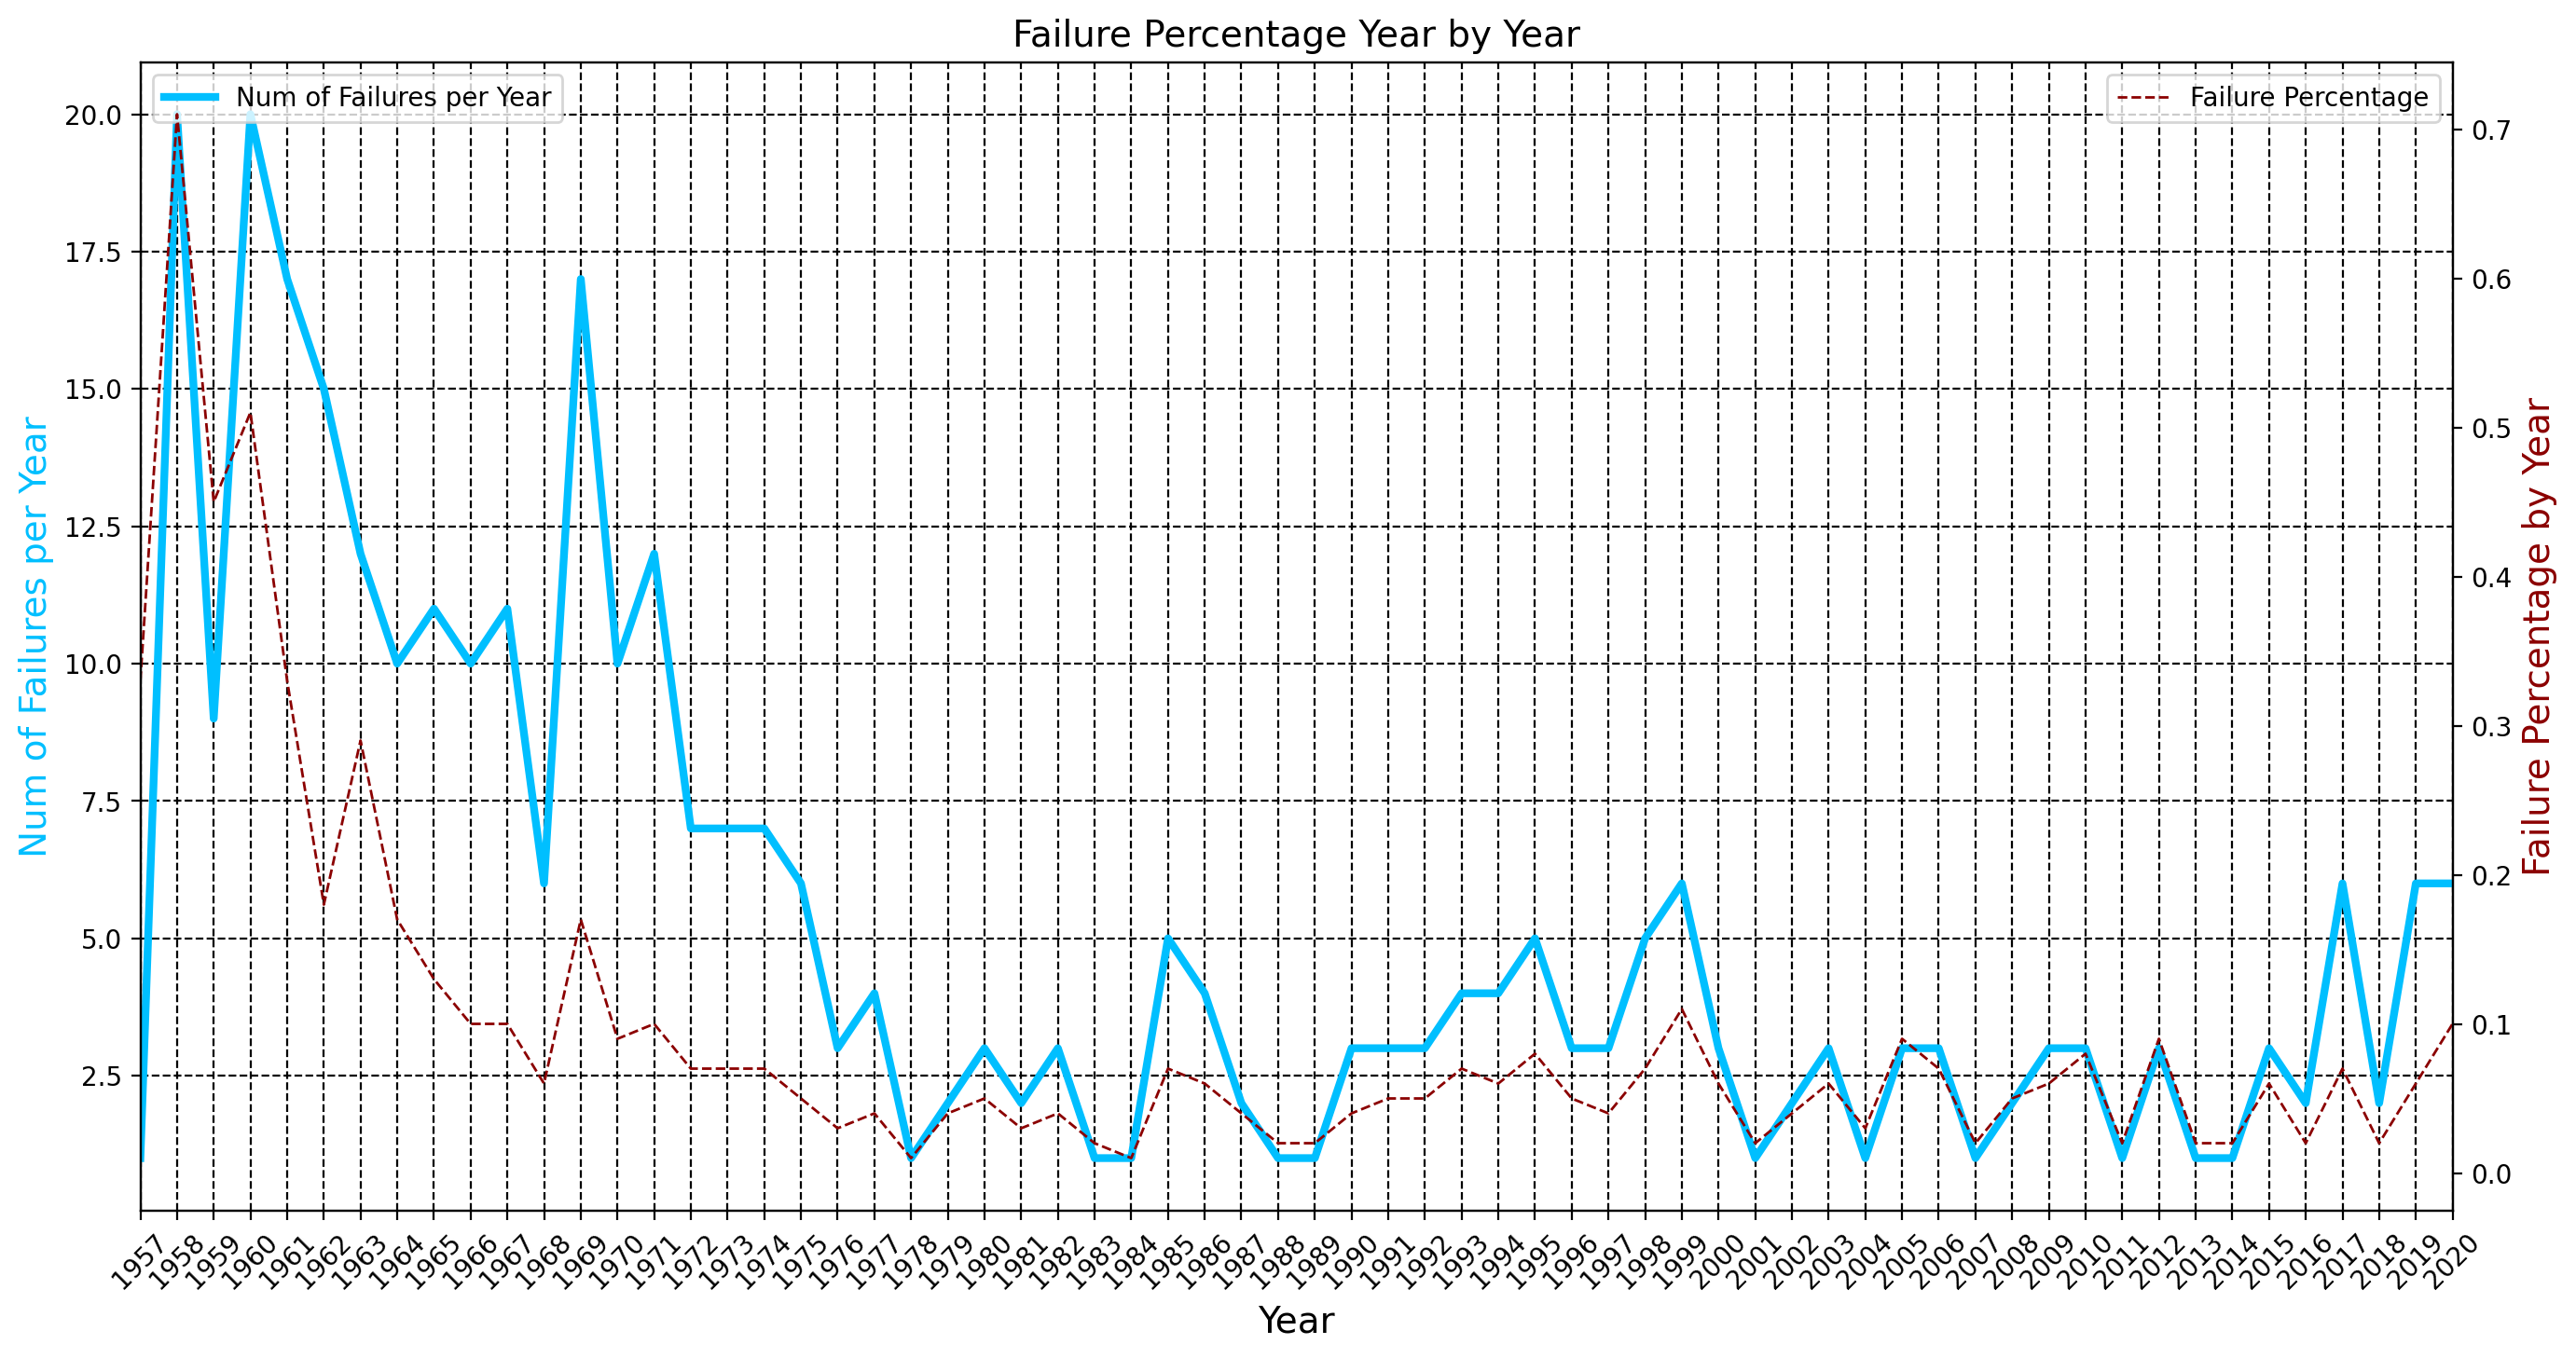

In [ ]:
year = mdates.YearLocator()
fmt = mdates.DateFormatter('%Y')

plt.figure(figsize = (16, 8), dpi = 200)
plt.title('Failure Percentage Year by Year', fontsize = 14)
plt.xticks(rotation = 45)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(num_stat_final['Year'],
         num_stat_final['Num'],
         c = 'deepskyblue',
         lw = 3,
         label = 'Num of Failures per Year')

ax2.plot(num_stat_final['Year'],
         num_stat_final['Failure_pct'],
         c = 'darkred',
         lw = 1,
         label = 'Failure Percentage',
         ls = '--')


ax1.set_xlim(num_stat_final['Year'].min(), num_stat_final['Year'].max())
ax1.set_xlabel('Year', fontsize = 14)
ax1.set_ylabel('Num of Failures per Year', c = 'deepskyblue', fontsize = 14)
ax2.set_ylabel('Failure Percentage by Year', c = 'darkred', fontsize = 14)

ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_major_formatter(fmt)


ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
plt.legend(loc='upper right')
ax1.grid(c = 'k', ls = '--')


plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [ ]:
country_by_year = df_data.groupby(['Year', 'Country'], as_index=False).agg({'Detail' : 'count'})
country_by_year.rename({'Detail' : 'Num_mission_yearly'}, axis = 1, inplace = True)
country_by_year.sort_values('Year', inplace=True, ascending = True)
country_by_year['Total'] = country_by_year.groupby('Country')['Num_mission_yearly'].cumsum()

In [ ]:
px_line = px.line(data_frame = country_by_year,
                  x = 'Year',
                  y = 'Total',
                  color = 'Country',
                  title = 'Total Num of Missions on a Year-to-Year basis')

px_line.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [ ]:
org_year = df_data.groupby(['Year', 'Organisation'], as_index=False).agg({'Date' : 'count'})
org_year.rename({'Date' : 'Num_per_year'}, axis = 1, inplace = True)

In [ ]:
org_year['Total'] = org_year.groupby('Organisation')['Num_per_year'].cumsum()
org_year.sort_values('Year', ascending = True, inplace = True)
org_year

,Year,Organisation,Num_per_year,Total
0,1957-01-01,RVSN USSR,2,2
1,1957-01-01,US Navy,1,1
2,1958-01-01,AMBA,7,7
3,1958-01-01,NASA,2,2
4,1958-01-01,RVSN USSR,5,7
...,...,...,...,...
644,2020-01-01,SpaceX,14,100
645,2020-01-01,ULA,4,140
639,2020-01-01,JAXA,1,7
635,2020-01-01,ExPace,3,10


In [ ]:
px_line = px.line(data_frame = org_year,
                  x = 'Year',
                  y = 'Total',
                  title = 'Total Number of Missions on a Year-to-Year basis',
                  color = 'Organisation')


px_line.update_layout(xaxis_title = 'Year',
                      yaxis_title = 'Organization')



px_line.show()